In [1]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

pd.set_option('display.max_rows', None)

In [65]:
df=pd.read_csv('C:/Users/1020n/OneDrive/바탕 화면/빅콘테스트/부산/부산광역시_stay.csv')

In [4]:
df.head()

,stay,stay_시도명,stay_시군구명,stay_읍면동명,date,time,gender,age,purpose,stay_cnts,weekday,is_holiday,is_weekend
0,부산광역시 동래구 안락제2동,부산광역시,동래구,안락제2동,2023-09-01,14:00,남성,40대,귀가,803,금,평일,평일
1,부산광역시 부산진구 연지동,부산광역시,부산진구,연지동,2023-09-01,11:00,여성,50대,귀가,1175,금,평일,평일
2,부산광역시 수영구 수영동,부산광역시,수영구,수영동,2023-09-01,17:00,남성,30대,귀가,819,금,평일,평일
3,부산광역시 사상구 모라제1동,부산광역시,사상구,모라제1동,2023-09-01,17:00,여성,9세이하,귀가,786,금,평일,평일
4,부산광역시 남구 대연제3동,부산광역시,남구,대연제3동,2023-09-01,09:00,여성,10대,여행,838,금,평일,평일


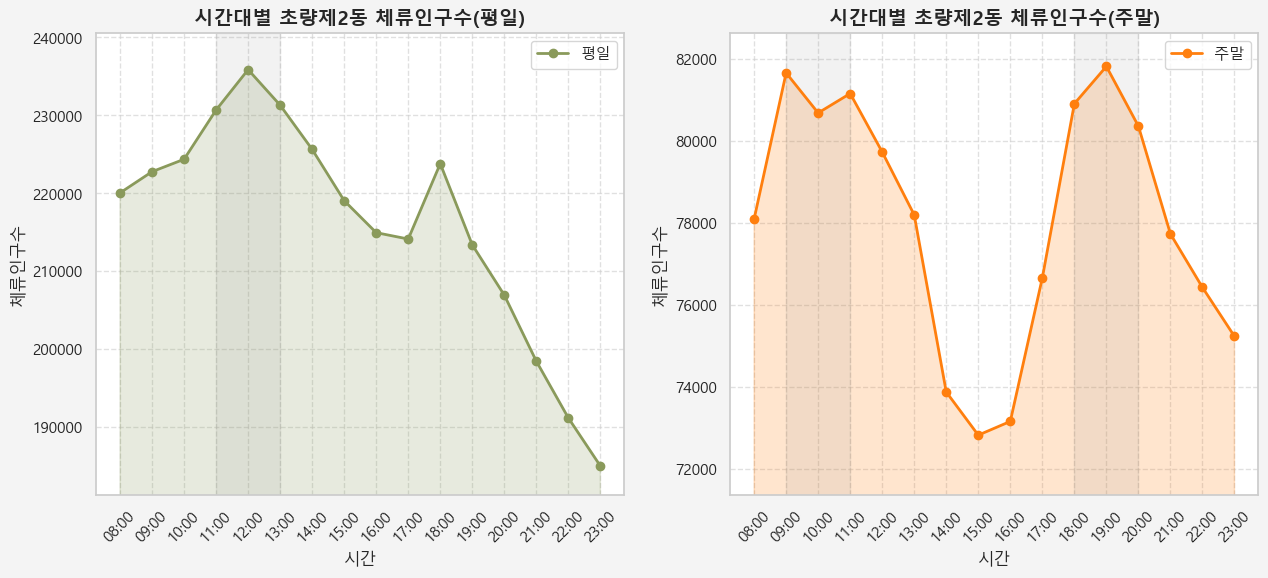

In [87]:
df1 = df[df['stay_읍면동명'] == '초량제2동']
data1 = df1[df1['is_weekend'] == '평일'].groupby('time')['stay_cnts'].sum()
data2 = df1[df1['is_weekend'] == '주말'].groupby('time')['stay_cnts'].sum()

# 그래프
fig, axes = plt.subplots(1, 2, figsize=(15, 6), facecolor='#f4f4f4')

# data1
axes[0].plot(data1.index, data1.values, marker='o', linestyle='-', linewidth=2, color='#8A9A5B', label='평일', zorder=5)
axes[0].fill_between(data1.index, data1.values, color='#8A9A5B', alpha=0.2)  
axes[0].set_title('시간대별 초량제2동 체류인구수(평일)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('시간', fontsize=12)
axes[0].set_ylabel('체류인구수', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6, zorder=1)  
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].axvspan('11:00','13:00', color='gray', alpha=0.1)
axes[0].set_ylim(data1.min() * 0.98, data1.max() * 1.02)

# data2
axes[1].plot(data2.index, data2.values, marker='o', linestyle='-', linewidth=2, color='#ff7f0e', label='주말', zorder=5)
axes[1].fill_between(data2.index, data2.values, color='#ff7f0e', alpha=0.2)  
axes[1].set_title('시간대별 초량제2동 체류인구수(주말)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('시간', fontsize=12)
axes[1].set_ylabel('체류인구수', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6, zorder=1)  
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].axvspan('09:00','11:00', color='gray', alpha=0.1)
axes[1].axvspan('18:00','20:00', color='gray', alpha=0.1)
axes[1].set_ylim(data2.min() * 0.98, data2.max() * 1.01)

plt.show()

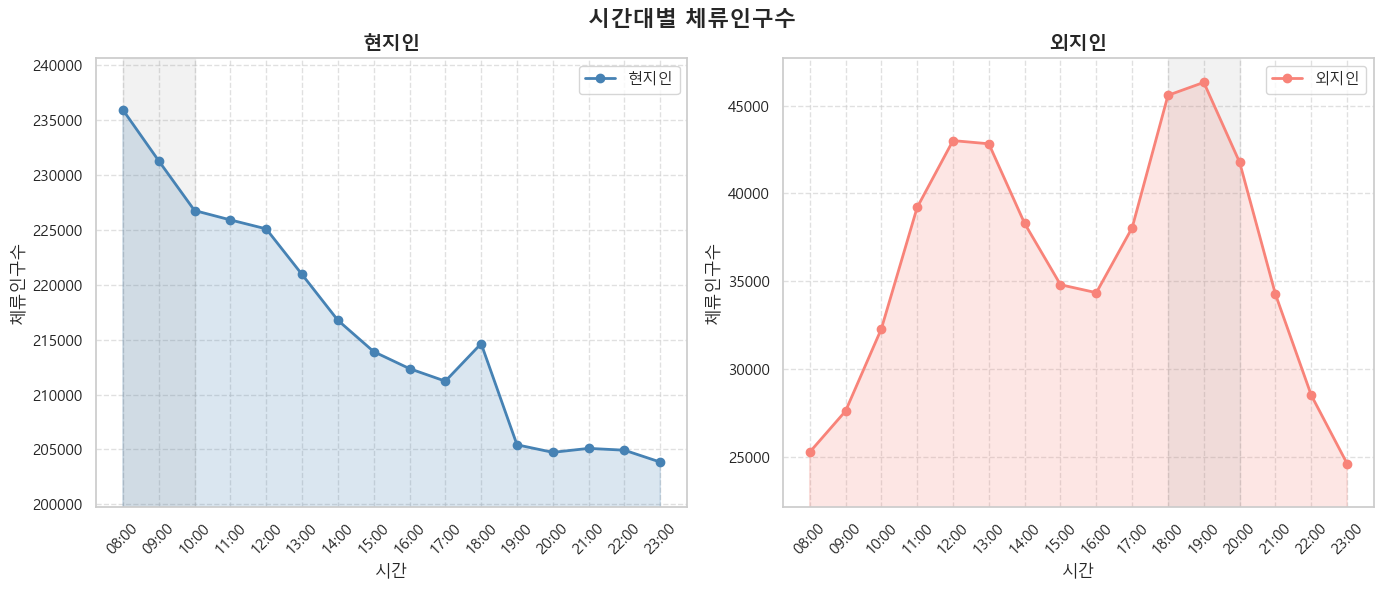

In [160]:
df1 = df[df['stay_읍면동명'] == '초량제2동']
data1 = df1[df1['purpose'].isin(['귀가', '업무', '학업'])].groupby('time')['stay_cnts'].sum()
data2 = df1[df1['purpose'].isin(['여행','쇼핑여가'])].groupby('time')['stay_cnts'].sum()

# 그래프
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# data1
axes[0].plot(data1.index, data1.values, marker='o', linestyle='-', linewidth=2, color='#4682b4', label='현지인', zorder=5)
axes[0].fill_between(data1.index, data1.values, color='#4682b4', alpha=0.2)  
axes[0].set_title('현지인', fontsize=14,fontweight='bold')
axes[0].set_xlabel('시간', fontsize=12)
axes[0].set_ylabel('체류인구수', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6, zorder=1)  
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].axvspan('08:00','10:00', color='gray', alpha=0.1)
axes[0].set_ylim(data1.min() * 0.98, data1.max() * 1.02)

# data2
axes[1].plot(data2.index, data2.values, marker='o', linestyle='-', linewidth=2, color='#f88379', label='외지인', zorder=5)
axes[1].fill_between(data2.index, data2.values, color='#f88379', alpha=0.2)  
axes[1].set_title('외지인', fontsize=14,fontweight='bold')
axes[1].set_xlabel('시간', fontsize=12)
axes[1].set_ylabel('체류인구수', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6, zorder=1)  
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].axvspan('18:00','20:00', color='gray', alpha=0.1)
axes[1].set_ylim(data2.min() * 0.9, data2.max() * 1.03)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('시간대별 체류인구수', fontsize=16, fontweight='bold')


plt.show()

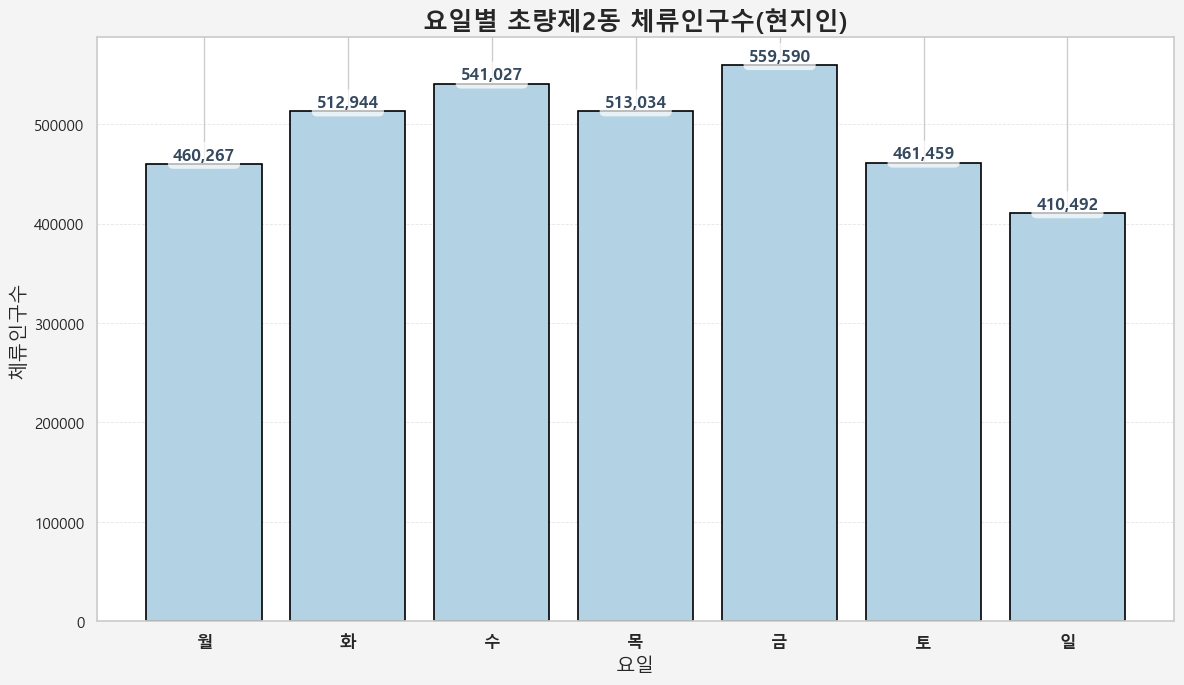

In [94]:
df1 = df[df['stay_읍면동명'] == '초량제2동']
df1 = df1[df1['purpose'].isin(['귀가', '업무', '학업'])]

weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# 'weekday' 열을 카테고리형으로 변환하여 순서 지정
df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)

# 요일별 체류인구수 합계 계산 및 정렬
result = df1.groupby('weekday')['stay_cnts'].sum().reindex(weekday_order)



plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 7), facecolor='#f4f4f4')
bars = plt.bar(
    result.index, result.values,
    color='#B3D2E3', 
    edgecolor='black',
    linewidth=1.2
)

plt.title('요일별 초량제2동 체류인구수(현지인)', fontsize=18, fontweight='bold')
plt.xlabel('요일', fontsize=14)
plt.ylabel('체류인구수', fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{int(yval):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

plt.tight_layout()
plt.subplots_adjust(bottom=0.1) 

plt.show()

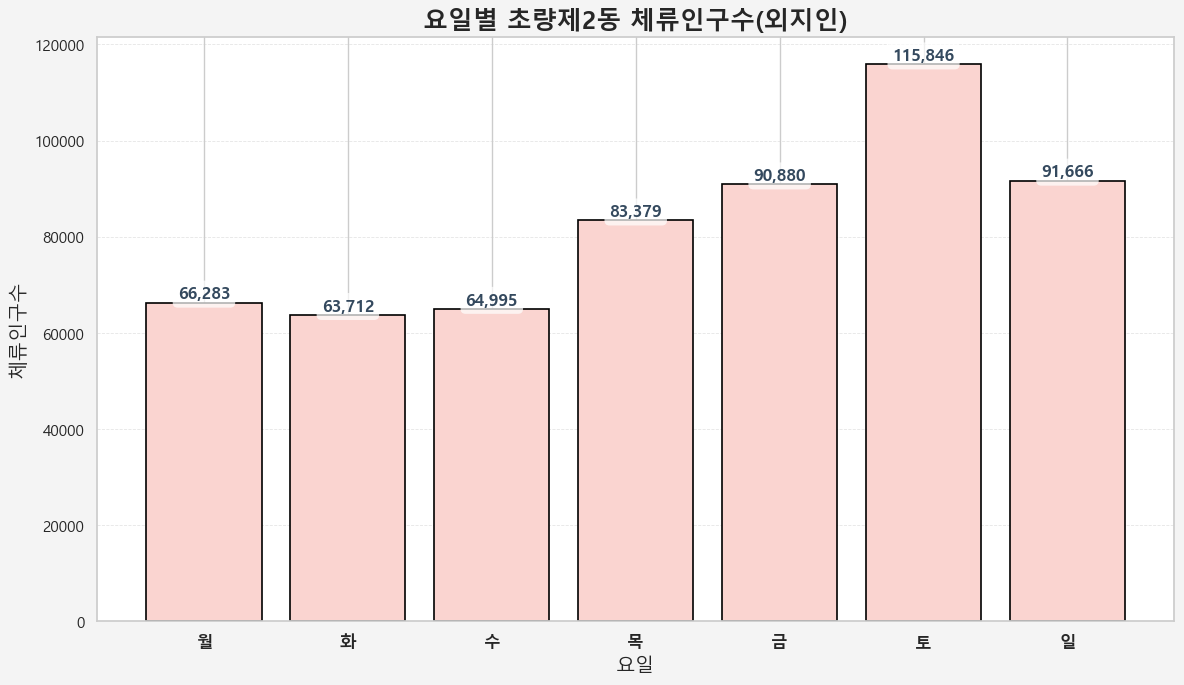

In [104]:
df1 = df[df['stay_읍면동명'] == '초량제2동']
df1 = df1[df1['purpose'].isin(['여행','쇼핑여가'])]

weekday_order = ['월', '화', '수', '목', '금', '토', '일']

# 'weekday' 열을 카테고리형으로 변환하여 순서 지정
df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)

# 요일별 체류인구수 합계 계산 및 정렬
result = df1.groupby('weekday')['stay_cnts'].sum().reindex(weekday_order)



plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 7), facecolor='#f4f4f4')
bars = plt.bar(
    result.index, result.values,
    color='#FAD4D0', 
    edgecolor='black',
    linewidth=1.2
)

plt.title('요일별 초량제2동 체류인구수(외지인)', fontsize=18, fontweight='bold')
plt.xlabel('요일', fontsize=14)
plt.ylabel('체류인구수', fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{int(yval):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

plt.tight_layout()
plt.subplots_adjust(bottom=0.1) 

plt.show()

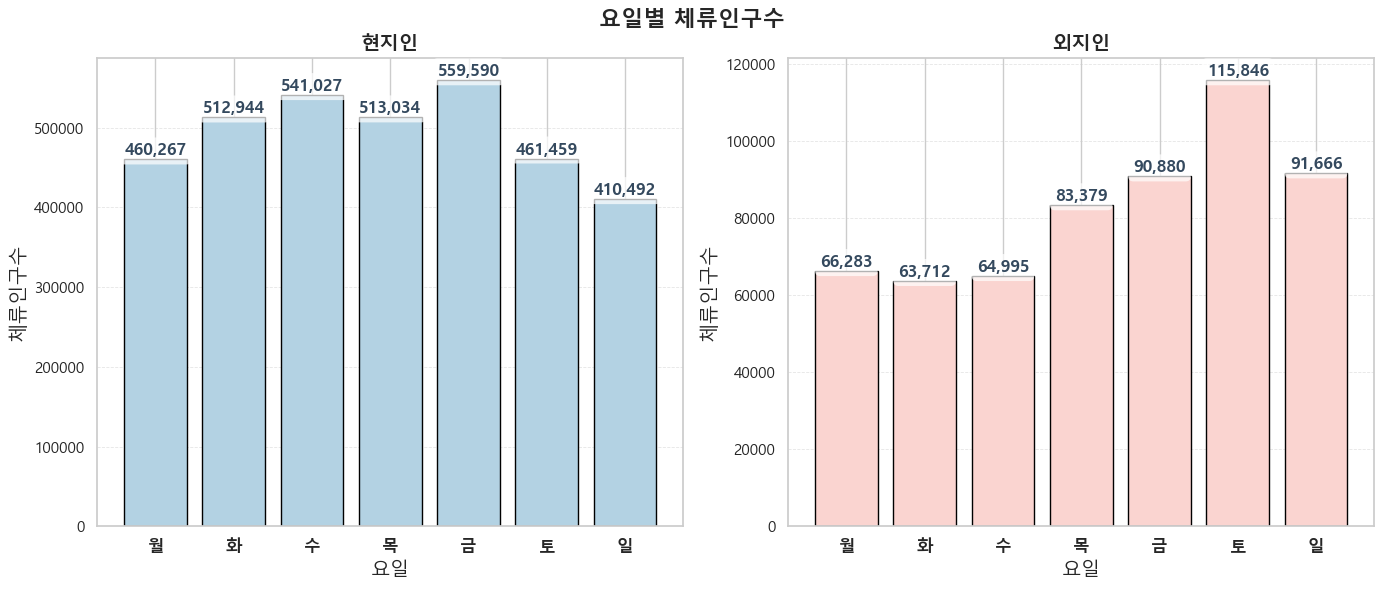

In [163]:
# 데이터 준비 공통 부분 (현지인)
df1_local = df[df['stay_읍면동명'] == '초량제2동']
df1_local = df1_local[df1_local['purpose'].isin(['귀가', '업무', '학업'])]

weekday_order = ['월', '화', '수', '목', '금', '토', '일']
df1_local['weekday'] = pd.Categorical(df1_local['weekday'], categories=weekday_order, ordered=True)

# 현지인 요일별 체류인구수 합계 계산 및 정렬
result_local = df1_local.groupby('weekday')['stay_cnts'].sum().reindex(weekday_order)

# 데이터 준비 공통 부분 (외지인)
df1_outsider = df[df['stay_읍면동명'] == '초량제2동']
df1_outsider = df1_outsider[df1_outsider['purpose'].isin(['여행', '쇼핑여가'])]

df1_outsider['weekday'] = pd.Categorical(df1_outsider['weekday'], categories=weekday_order, ordered=True)

# 외지인 요일별 체류인구수 합계 계산 및 정렬
result_outsider = df1_outsider.groupby('weekday')['stay_cnts'].sum().reindex(weekday_order)

# 한 화면에 두 개의 그래프 배치
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯: 현지인
bars_local = axes[0].bar(
    result_local.index, result_local.values,
    color='#B3D2E3', 
    edgecolor='black',
    linewidth=1
)
axes[0].set_title('현지인', fontsize=14, fontweight='bold')
axes[0].set_xlabel('요일', fontsize=14)
axes[0].set_ylabel('체류인구수', fontsize=14)
axes[0].set_xticks(range(len(weekday_order)))
axes[0].set_xticklabels(weekday_order, fontsize=12, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

# 막대 위에 값 표시 (현지인)
for bar in bars_local:
    yval = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{int(yval):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

# 두 번째 서브플롯: 외지인
bars_outsider = axes[1].bar(
    result_outsider.index, result_outsider.values,
    color='#FAD4D0', 
    edgecolor='black',
    linewidth=1
)
axes[1].set_title('외지인', fontsize=14, fontweight='bold')
axes[1].set_xlabel('요일', fontsize=14)
axes[1].set_ylabel('체류인구수', fontsize=14)
axes[1].set_xticks(range(len(weekday_order)))
axes[1].set_xticklabels(weekday_order, fontsize=12, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

# 막대 위에 값 표시 (외지인)
for bar in bars_outsider:
    yval = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{int(yval):,}', 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

# 전체 레이아웃 정리
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('요일별 체류인구수', fontsize=16, fontweight='bold')

# 그래프 보여주기
plt.show()


C:\Users\1020n\AppData\Local\Temp\ipykernel_45864\780685379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)


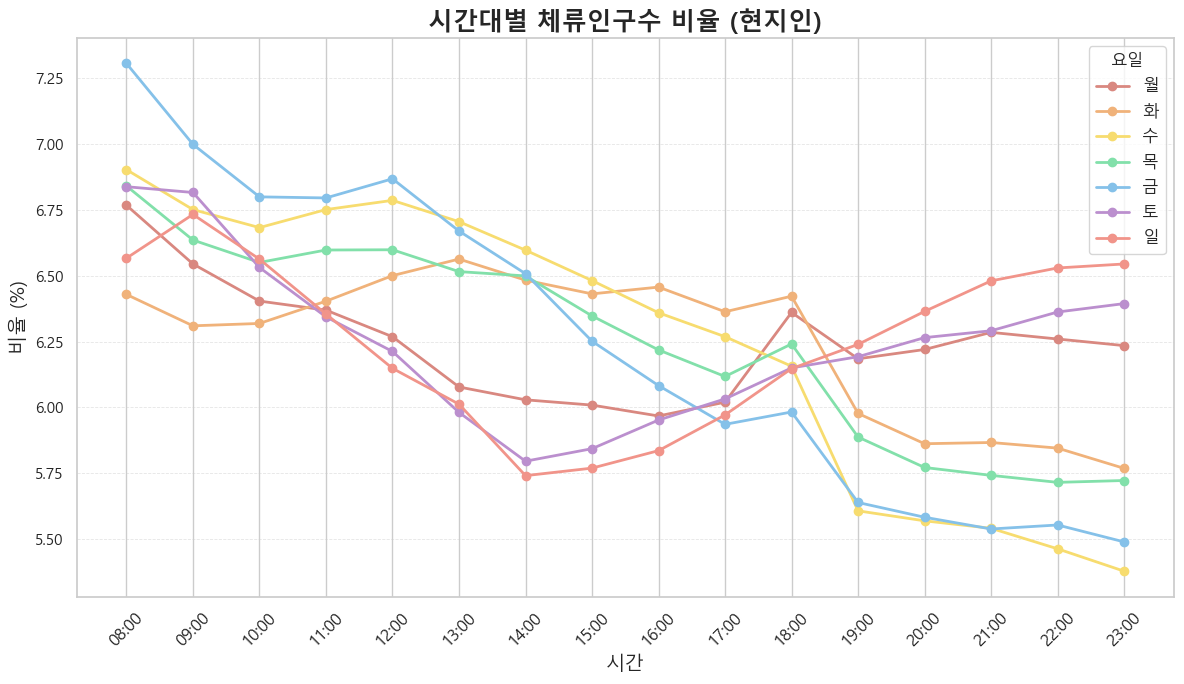

In [131]:
df1 = df[df['stay_읍면동명'] == '초량제2동']
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)
weekday_time_sum = df1[df1['purpose'].isin(['귀가', '업무', '학업'])].groupby(['weekday', 'time'])['stay_cnts'].sum().reset_index()
weekday_total_sum = weekday_time_sum.groupby('weekday')['stay_cnts'].transform('sum')
weekday_time_sum['ratio'] = weekday_time_sum['stay_cnts'] / weekday_total_sum * 100


weekday_colors = {
    '월': '#D98880',
    '화': '#F0B27A',
    '수': '#F7DC6F',
    '목': '#82E0AA',
    '금': '#85C1E9',
    '토': '#BB8FCE',
    '일': '#F1948A'
}

# 요일과 시간대별 비율을 구한 DataFrame에서 요일별로 꺾은선 그래프 그리기
plt.figure(figsize=(12, 7))

# 각 요일별로 데이터를 필터링하고 꺾은선 그래프를 그리기
for weekday in weekday_time_sum['weekday'].unique():
    data = weekday_time_sum[weekday_time_sum['weekday'] == weekday]
    plt.plot(
        data['time'], data['ratio'],
        marker='o', linestyle='-', linewidth=2, 
        label=weekday, color=weekday_colors.get(weekday, '#000000')  # 색상 지정
    )

# 그래프 제목 및 라벨 설정
plt.title('시간대별 체류인구수 비율 (현지인)', fontsize=18, fontweight='bold')
plt.xlabel('시간', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)

# x축 레이블 회전 및 스타일 조정
plt.xticks(rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

plt.legend(title='요일', fontsize=12)

plt.tight_layout()

plt.show()

C:\Users\1020n\AppData\Local\Temp\ipykernel_45864\838844581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)


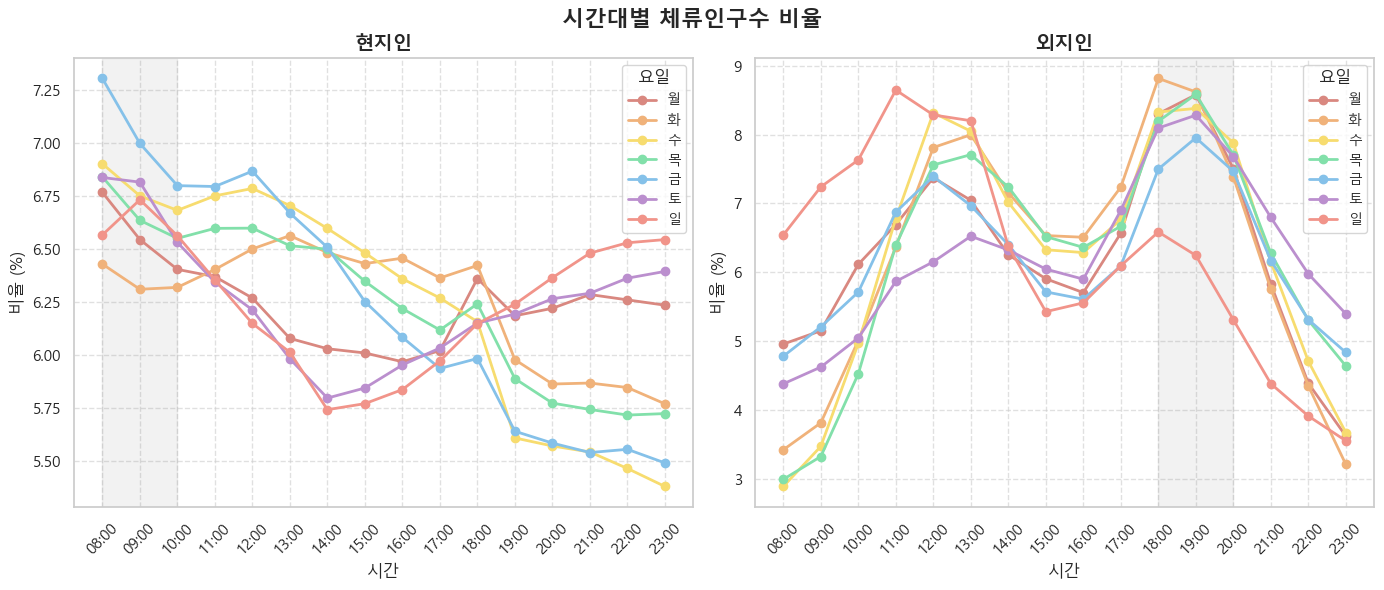

In [165]:
import matplotlib.pyplot as plt

# 데이터 준비 공통 부분
df1 = df[df['stay_읍면동명'] == '초량제2동']
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)

# 현지인 데이터 준비
weekday_time_sum_local = df1[df1['purpose'].isin(['귀가', '업무', '학업'])].groupby(['weekday', 'time'])['stay_cnts'].sum().reset_index()
weekday_total_sum_local = weekday_time_sum_local.groupby('weekday')['stay_cnts'].transform('sum')
weekday_time_sum_local['ratio'] = weekday_time_sum_local['stay_cnts'] / weekday_total_sum_local * 100

# 외지인 데이터 준비
weekday_time_sum_outsider = df1[df1['purpose'].isin(['쇼핑여가','여행'])].groupby(['weekday', 'time'])['stay_cnts'].sum().reset_index()
weekday_total_sum_outsider = weekday_time_sum_outsider.groupby('weekday')['stay_cnts'].transform('sum')
weekday_time_sum_outsider['ratio'] = weekday_time_sum_outsider['stay_cnts'] / weekday_total_sum_outsider * 100

# 요일별 차분하고 따뜻한 색상 지정
weekday_colors = {
    '월': '#D98880',
    '화': '#F0B27A',
    '수': '#F7DC6F',
    '목': '#82E0AA',
    '금': '#85C1E9',
    '토': '#BB8FCE',
    '일': '#F1948A'
}

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯: 현지인
for weekday in weekday_time_sum_local['weekday'].unique():
    data = weekday_time_sum_local[weekday_time_sum_local['weekday'] == weekday]
    axes[0].plot(
        data['time'], data['ratio'],
        marker='o', linestyle='-', linewidth=2, 
        label=weekday, color=weekday_colors.get(weekday, '#000000')
    )
axes[0].set_title('현지인', fontsize=14, fontweight='bold')
axes[0].set_xlabel('시간', fontsize=12)
axes[0].set_ylabel('비율 (%)', fontsize=12)
axes[0].legend(title='요일', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6, zorder=1)
axes[0].tick_params(axis='x', rotation=45)
axes[0].axvspan('08:00','10:00', color='gray', alpha=0.1)

# 두 번째 서브플롯: 외지인
for weekday in weekday_time_sum_outsider['weekday'].unique():
    data = weekday_time_sum_outsider[weekday_time_sum_outsider['weekday'] == weekday]
    axes[1].plot(
        data['time'], data['ratio'],
        marker='o', linestyle='-', linewidth=2, 
        label=weekday, color=weekday_colors.get(weekday, '#000000')
    )
axes[1].set_title('외지인', fontsize=14, fontweight='bold')
axes[1].set_xlabel('시간', fontsize=12)
axes[1].set_ylabel('비율 (%)', fontsize=12)
axes[1].legend(title='요일', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6, zorder=1)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axvspan('18:00','20:00', color='gray', alpha=0.1)

# 전체 레이아웃 정리
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('시간대별 체류인구수 비율', fontsize=16, fontweight='bold')

plt.show()

C:\Users\1020n\AppData\Local\Temp\ipykernel_45864\1360245268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)


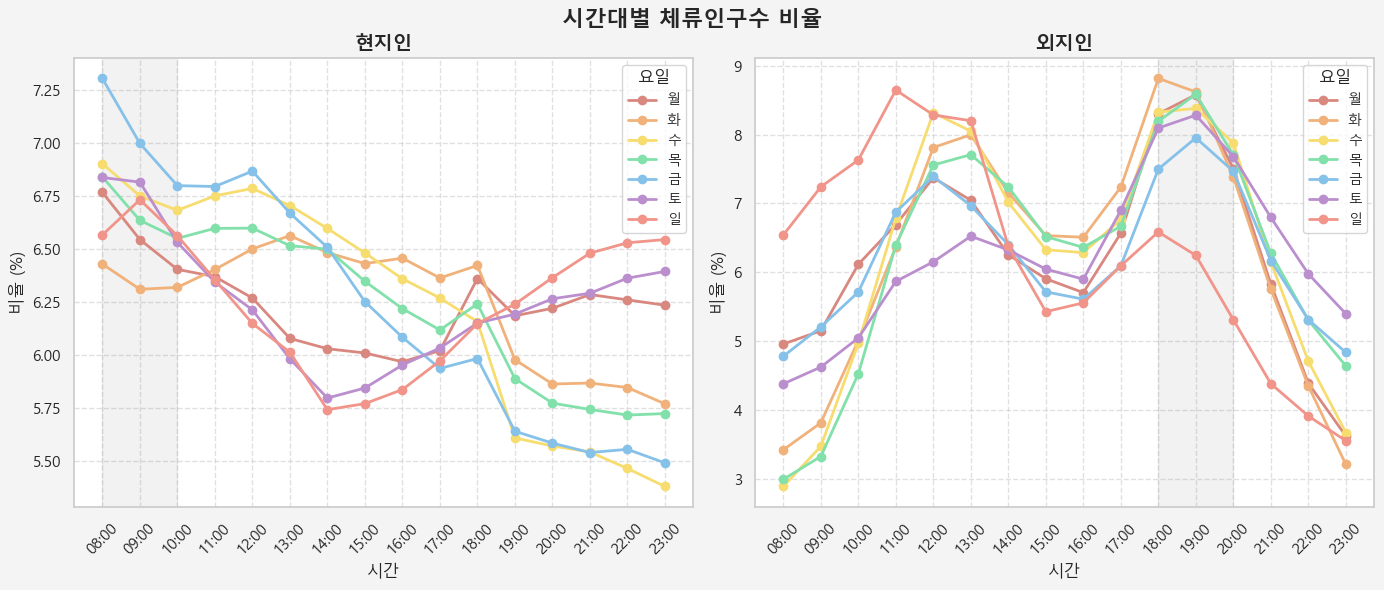

In [164]:
import matplotlib.pyplot as plt

# 데이터 준비 공통 부분
df1 = df[df['stay_읍면동명'] == '초량제2동']
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
df1['weekday'] = pd.Categorical(df1['weekday'], categories=weekday_order, ordered=True)

# 현지인 데이터 준비
weekday_time_sum_local = df1[df1['purpose'].isin(['귀가', '업무', '학업'])].groupby(['weekday', 'time'])['stay_cnts'].sum().reset_index()
weekday_total_sum_local = weekday_time_sum_local.groupby('weekday')['stay_cnts'].transform('sum')
weekday_time_sum_local['ratio'] = weekday_time_sum_local['stay_cnts'] / weekday_total_sum_local * 100

# 외지인 데이터 준비
weekday_time_sum_outsider = df1[df1['purpose'].isin(['쇼핑여가','여행'])].groupby(['weekday', 'time'])['stay_cnts'].sum().reset_index()
weekday_total_sum_outsider = weekday_time_sum_outsider.groupby('weekday')['stay_cnts'].transform('sum')
weekday_time_sum_outsider['ratio'] = weekday_time_sum_outsider['stay_cnts'] / weekday_total_sum_outsider * 100

# 요일별 차분하고 따뜻한 색상 지정
weekday_colors = {
    '월': '#D98880',
    '화': '#F0B27A',
    '수': '#F7DC6F',
    '목': '#82E0AA',
    '금': '#85C1E9',
    '토': '#BB8FCE',
    '일': '#F1948A'
}

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='#f4f4f4')

# 첫 번째 서브플롯: 현지인
for weekday in weekday_time_sum_local['weekday'].unique():
    data = weekday_time_sum_local[weekday_time_sum_local['weekday'] == weekday]
    axes[0].plot(
        data['time'], data['ratio'],
        marker='o', linestyle='-', linewidth=2, 
        label=weekday, color=weekday_colors.get(weekday, '#000000')
    )
axes[0].set_title('현지인', fontsize=14, fontweight='bold')
axes[0].set_xlabel('시간', fontsize=12)
axes[0].set_ylabel('비율 (%)', fontsize=12)
axes[0].legend(title='요일', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6, zorder=1)
axes[0].tick_params(axis='x', rotation=45)
axes[0].axvspan('08:00','10:00', color='gray', alpha=0.1)

# 두 번째 서브플롯: 외지인
for weekday in weekday_time_sum_outsider['weekday'].unique():
    data = weekday_time_sum_outsider[weekday_time_sum_outsider['weekday'] == weekday]
    axes[1].plot(
        data['time'], data['ratio'],
        marker='o', linestyle='-', linewidth=2, 
        label=weekday, color=weekday_colors.get(weekday, '#000000')
    )
axes[1].set_title('외지인', fontsize=14, fontweight='bold')
axes[1].set_xlabel('시간', fontsize=12)
axes[1].set_ylabel('비율 (%)', fontsize=12)
axes[1].legend(title='요일', fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6, zorder=1)
axes[1].tick_params(axis='x', rotation=45)
axes[1].axvspan('18:00','20:00', color='gray', alpha=0.1)

# 전체 레이아웃 정리
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('시간대별 체류인구수 비율', fontsize=16, fontweight='bold')

plt.show()

In [203]:
df1 = df[df['stay_읍면동명'] == '초량제2동']

# 새로운 연령대 그룹 설정
def age_grouping(age):
    if age in ['9세이하']:
        return '9세 이하'
    elif age in ['10대']:
        return '10대'
    elif age in ['20대', '30대']:
        return '20-30대'
    elif age in ['40대', '50대']:
        return '40-50대'
    else:
        return '60대 이상'

# 데이터프레임에 새로운 그룹 컬럼 추가
df1['age_group'] = df1['age'].apply(age_grouping)

# 현지인과 외지인 분류하는 함수 정의
def classify_resident_type(purpose):
    if purpose in ['귀가', '학업', '업무']:
        return '현지인'
    elif purpose in ['여행', '쇼핑여가']:
        return '외지인'
    else:
        return '기타'  # '기타' 값에 대한 처리

# 새로운 resident_type 컬럼 생성
df1['resident_type'] = df1['purpose'].apply(classify_resident_type)

C:\Users\1020n\AppData\Local\Temp\ipykernel_45864\2206866552.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = df1['age'].apply(age_grouping)
C:\Users\1020n\AppData\Local\Temp\ipykernel_45864\2206866552.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['resident_type'] = df1['purpose'].apply(classify_resident_type)


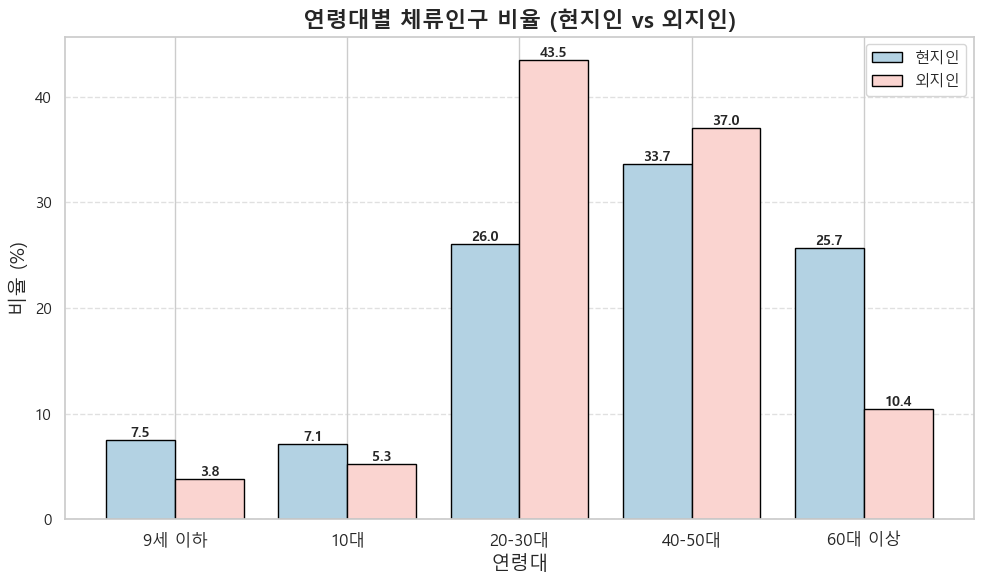

In [204]:
stay_sum=df1.groupby(['age_group', 'resident_type'])['stay_cnts'].sum().reset_index()
stay_total = stay_sum.groupby('resident_type')['stay_cnts'].transform('sum')
stay_sum['ratio']=stay_sum['stay_cnts']/stay_total * 100

stay_sum['age_group'] = pd.Categorical(stay_sum['age_group'], categories=['9세 이하', '10대', '20-30대', '40-50대', '60대 이상'], ordered=True)

# 각 resident_type에 해당하는 데이터 필터링 및 정렬
local_ratios = stay_sum[stay_sum['resident_type'] == '현지인'].sort_values(by='age_group')['ratio']
outsider_ratios = stay_sum[stay_sum['resident_type'] == '외지인'].sort_values(by='age_group')['ratio']

# x축 위치 설정
age_unique = stay_sum['age_group'].cat.categories
x = np.arange(len(age_unique))
width = 0.4  # 막대 너비

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 현지인과 외지인의 막대 그래프 나란히 그리기
bars1 = ax.bar(x - width/2, local_ratios, width, label='현지인', color='#B3D2E3', edgecolor='black')
bars2 = ax.bar(x + width/2, outsider_ratios, width, label='외지인', color='#FAD4D0', edgecolor='black')

# x축 레이블, y축 레이블, 제목 설정
ax.set_xlabel('연령대', fontsize=14)
ax.set_ylabel('비율 (%)', fontsize=14)
ax.set_title('연령대별 체류인구 비율 (현지인 vs 외지인)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(age_unique, fontsize=12)

# y축 격자 추가
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 값 표시
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


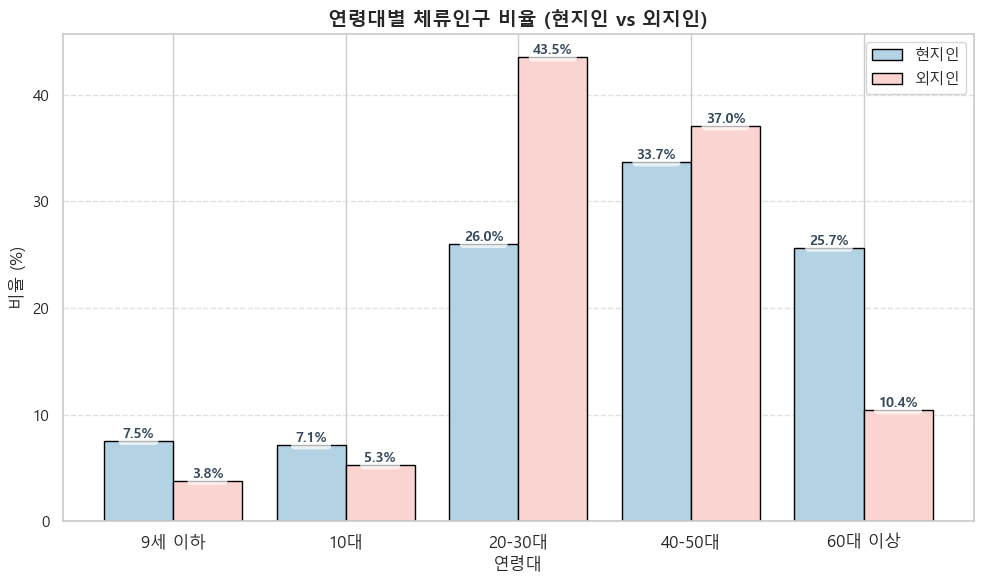

In [205]:
stay_sum=df1.groupby(['age_group', 'resident_type'])['stay_cnts'].sum().reset_index()
stay_total = stay_sum.groupby('resident_type')['stay_cnts'].transform('sum')
stay_sum['ratio']=stay_sum['stay_cnts']/stay_total * 100

stay_sum['age_group'] = pd.Categorical(stay_sum['age_group'], categories=['9세 이하', '10대', '20-30대', '40-50대', '60대 이상'], ordered=True)

# 각 resident_type에 해당하는 데이터 필터링 및 정렬
local_ratios = stay_sum[stay_sum['resident_type'] == '현지인'].sort_values(by='age_group')['ratio']
outsider_ratios = stay_sum[stay_sum['resident_type'] == '외지인'].sort_values(by='age_group')['ratio']

# x축 위치 설정
age_unique = stay_sum['age_group'].cat.categories
x = np.arange(len(age_unique))
width = 0.4  # 막대 너비

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 현지인과 외지인의 막대 그래프 나란히 그리기
bars1 = ax.bar(x - width/2, local_ratios, width, label='현지인', color='#B3D2E3', edgecolor='black')
bars2 = ax.bar(x + width/2, outsider_ratios, width, label='외지인', color='#FAD4D0', edgecolor='black')

# x축 레이블, y축 레이블, 제목 설정
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_title('연령대별 체류인구 비율 (현지인 vs 외지인)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(age_unique, fontsize=12)

# y축 격자 추가
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 값 표시
for bar in bars1:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{yval:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )
for bar in bars2:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{yval:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()
    


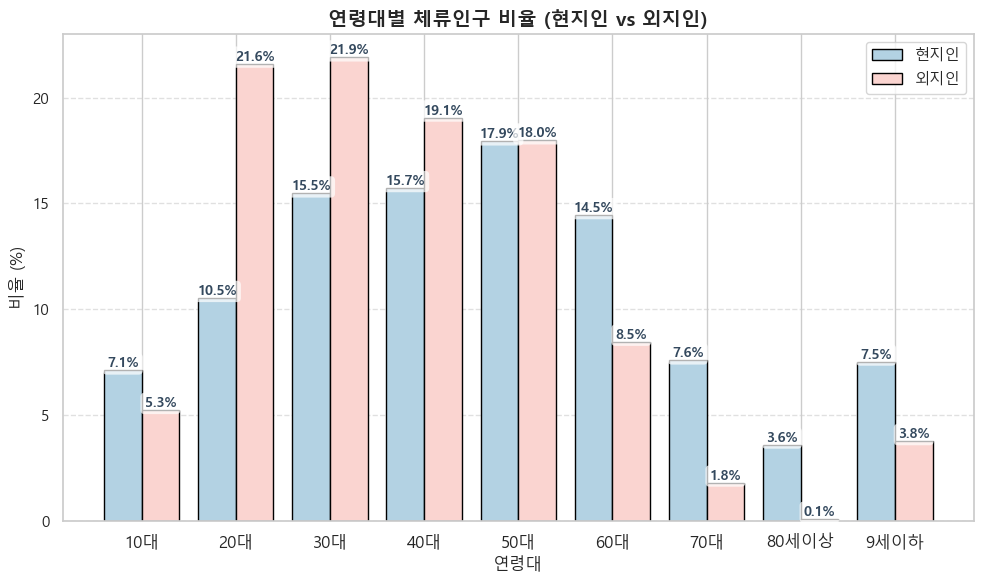

In [207]:
stay_sum=df1.groupby(['age', 'resident_type'])['stay_cnts'].sum().reset_index()
stay_total = stay_sum.groupby('resident_type')['stay_cnts'].transform('sum')
stay_sum['ratio']=stay_sum['stay_cnts']/stay_total * 100

# 각 resident_type에 해당하는 데이터 필터링 및 정렬
local_ratios = stay_sum[stay_sum['resident_type'] == '현지인'].sort_values(by='age')['ratio']
outsider_ratios = stay_sum[stay_sum['resident_type'] == '외지인'].sort_values(by='age')['ratio']

# x축 위치 설정
age_unique = stay_sum['age'].unique()
x = np.arange(len(age_unique))
width = 0.4  # 막대 너비

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 현지인과 외지인의 막대 그래프 나란히 그리기
bars1 = ax.bar(x - width/2, local_ratios, width, label='현지인', color='#B3D2E3', edgecolor='black')
bars2 = ax.bar(x + width/2, outsider_ratios, width, label='외지인', color='#FAD4D0', edgecolor='black')

# x축 레이블, y축 레이블, 제목 설정
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_title('연령대별 체류인구 비율 (현지인 vs 외지인)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(age_unique, fontsize=12)

# y축 격자 추가
ax.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 값 표시
for bar in bars1:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{yval:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )
for bar in bars2:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        yval, 
        f'{yval:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold', 
        color='#34495e',
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
    )

# 범례 추가
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()
    